In [1]:
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
from xgcm import Grid
from matplotlib import colors, ticker, cm
from xhistogram.xarray import histogram 
from matplotlib import colors as cols
import pandas as pd

In [2]:
data_dir = '/swot/SUM04/dbalwada/channel_beta/01km/tracer_exp2'

In [3]:
ds01 = open_mdsdataset(data_dir, delta_t=300, prefix=['U','V','W','PTRACER01','T'],iters=range(90+90*24*10-28*90, 90+90*24*10+32*90, 90*4),ignore_unknown_vars=True, geometry='cartesian')

In [4]:
horispace01 = 1e3
time_index = 0
depth = -50
f =  -0.83e-4
X = ds01.XC/1e3
Y = ds01.YC/1e3
daytime = 86400
# boxarea = horispace**2

In [5]:
grid01 = Grid(ds01, periodic='X')

In [6]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01

div01_0 = (grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))/horispace01


In [7]:
horispace01 = 1e3
time_index = 0
depth = -50
f =  -0.83e-4
X = ds01.XC/1e3
Y = ds01.YC/1e3
daytime = 86400

In [8]:
import matplotlib

font = {'family' : 'sans-serif',
        'size'   : 12}

matplotlib.rc('font', **font)

In [9]:
bband01 = np.linspace(-7, 7, 70)
cband01 = np.linspace(.5e-3, 7, 70)


binbox01 =  (bband01[1]-bband01[0])*(cband01[1]-cband01[0])

vort_part = (vort01_0.sel(XC=slice(13.7e5,14.2e5),YC=slice(4.6e5,5.1e5))/f).rename('vort1_0')
strain_part = (abs(strain01_0.sel(XC=slice(13.7e5,14.2e5),YC=slice(4.6e5,5.1e5))/f)).rename('strain1_0')


hab01_00 = histogram(vort_part,strain_part,dim = ['XC','YC'] , bins=[bband01,cband01])
hab01_00.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 15, vort1_0_bin: 69, strain1_0_bin: 69)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * vort1_0_bin    (vort1_0_bin) float64 -6.899 -6.696 -6.493 ... 6.696 6.899
  * strain1_0_bin  (strain1_0_bin) float64 0.05122 0.1527 0.2541 ... 6.848 6.949
Dimensions without coordinates: time

/home/qx344/.conda/envs/mitgcm/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/qx344/.conda/envs/mitgcm/lib/python3.6/site-packages/ipykernel/__main__.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/qx344/.conda/envs/mitgcm/lib/python3.6/site-packages/ipykernel/__main__.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either

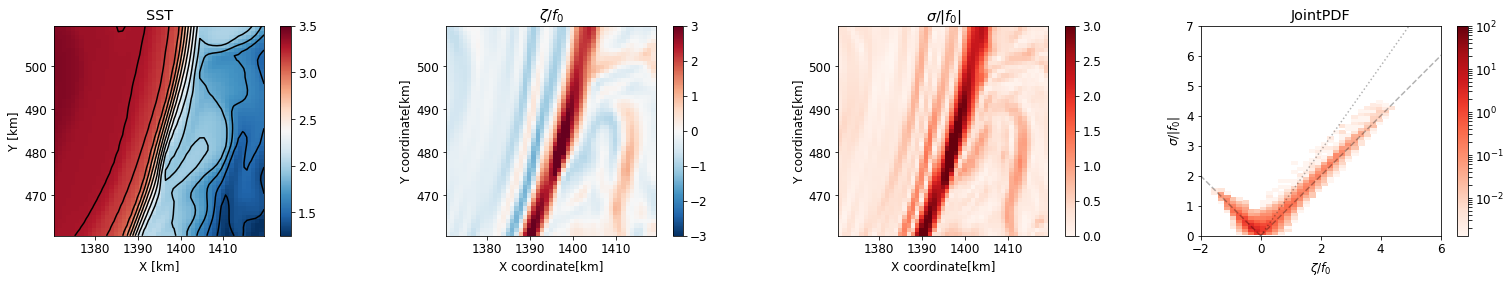

In [10]:
fig, ax = plt.subplots(1,4, figsize=(22,4))


timeInd = 5
### surface tracer forcing
SST = ds01['T'].isel(Z=0,time=timeInd).sel(XC=slice(13.7e5,14.2e5),YC=slice(4.6e5,5.1e5))
im00 = ax[0].pcolormesh(SST.XC.values/1000, SST.YC.values/1000, SST.rename(''), vmin = 1.25, vmax=3.5, cmap ='RdBu_r',
                          rasterized=True)
ax[0].set_xlabel('X [km]')
ax[0].set_ylabel('Y [km]')
ax[0].set_aspect('equal')
ax[0].set_title('SST')
h00 = fig.colorbar(im00, ax=ax[0])
# h00.set_label('kg/s')
ax[0].contour(SST.XC.values/1000, SST.YC.values/1000, SST.rename(''), levels=20, colors='k')




vortSur = vort_part.isel(time=timeInd)
im01 = ax[1].pcolormesh(vortSur.XC.values/1000, vortSur.YC.values/1000, vortSur.rename(''),  vmax = 3, vmin = -3, cmap ='RdBu_r',
                          rasterized=True)
ax[1].set_xlabel('X coordinate[km]')
ax[1].set_ylabel('Y coordinate[km]')
ax[1].set_aspect('equal')
ax[1].set_title('$\zeta/f_0$')
h01 = fig.colorbar(im01, ax=ax[1])




strainSur = strain_part.isel(time=timeInd)
im02 = ax[2].pcolormesh(strainSur.XC.values/1000, strainSur.YC.values/1000, strainSur.rename(''),  vmax = 3, vmin = 0, cmap ='Reds',
                          rasterized=True)
ax[2].set_xlabel('X coordinate[km]')
ax[2].set_ylabel('Y coordinate[km]')
ax[2].set_aspect('equal')
ax[2].set_title('$\sigma/|f_0|$')
h02 = fig.colorbar(im02, ax=ax[2])





histPart = (1/(binbox01*50**2)*(hab01_00.rename('')).mean(dim='time').T)
histPart = xr.where(histPart<1e-5,np.nan,histPart)
im03 = ax[3].pcolormesh(histPart.vort1_0_bin, histPart.strain1_0_bin, histPart, 
              vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap='Reds', 
                          rasterized=True)
ax[3].set_xlabel('$\zeta/f_0$')
ax[3].set_ylabel('$\sigma/|f_0|$')
ax[3].set_aspect('equal')
ax[3].set_title('JointPDF')
h03 = fig.colorbar(im03, ax=ax[3])
ax[3].plot(np.linspace(0,-7),np.linspace(0,7),'k--',alpha=.3)
ax[3].plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
ax[3].plot(np.linspace(0,7),np.sqrt(2)*np.linspace(0,7),'k:',alpha=.3)
ax[3].set_ylim(0, 7)
ax[3].set_xlim(-2, 6)
plt.tight_layout()

In [11]:
W01 = grid01.interp(ds01.W, 'Z', boundary='extend').sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)).mean(dim='time')
Wtracer01 = (grid01.interp(ds01.W, 'Z', boundary='extend')*ds01.PTRACER01).sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)).mean(dim='time')
tra1 = ds01.PTRACER01.sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)).isel(time=0)
tra2 = ds01.PTRACER01.sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)).isel(time=10)
tra3 = ds01.PTRACER01.sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)).isel(time=14)

In [12]:
T00 = ds01['T'].isel(time=0).sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)) 
T01 = ds01['T'].isel(time=10).sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)) 
T03 = ds01['T'].isel(time=14).sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)) 

In [13]:
T01.load()
T03.load()
T00.load()
tra1.load()
tra2.load()
tra3.load()
W01.load()
Wtracer01.load()

<xarray.DataArray (Z: 39, XC: 50)>
array([[ 2.8428772e-07,  1.4260030e-06,  5.9376373e-07, ...,
        -1.5869939e-06, -1.7728267e-06, -4.2428146e-06],
       [ 1.0471507e-06,  4.4712428e-06,  1.9055871e-06, ...,
        -4.7419326e-06, -5.3438321e-06, -1.2975580e-05],
       [ 1.9227996e-06,  7.8115972e-06,  3.2950049e-06, ...,
        -8.2959205e-06, -9.3645176e-06, -2.2659668e-05],
       ...,
       [ 1.0711631e-21,  1.7094550e-21, -5.5218123e-21, ...,
        -1.6090330e-21, -8.5725881e-21,  8.5671468e-21],
       [ 1.6677952e-22,  5.7599710e-22, -2.0634028e-22, ...,
         2.6754170e-23,  4.5375717e-24, -3.9023005e-23],
       [ 1.0024229e-23,  6.1808659e-23,  1.4053207e-23, ...,
        -8.1468032e-24, -1.9658652e-23,  1.1193809e-23]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 ... -380.8 -410.4 -441.3 -473.3
    YC       >f4 4.905e+05
  * XC       (XC) >f4 1.370e+06 1.372e+06 1.372e+06 ... 1.418e+06 1.42e+06
    rA       (XC) >f4 1e+06 1e+06 1e+06 1e+06 1e+06 ... 1e+06 1e+06 1e+06 1e+06
    Depth    (XC) >f4 3e+03 3e+03 3e+03 3e+03 3e+03 ... 3e+03 3e+03 3e+03 3e+03
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 ... 27.74 29.0 30.24 31.45 32.65
    PHrefC   (Z) >f4 4.905 15.4 27.37 41.05 ... 4.026e+03 4.329e+03 4.643e+03
    hFacC    (Z, XC) >f4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0
    maskC    (Z, XC) bool True True True True True ... True True True True True
    rhoRef   (Z) >f4 999.8 999.8 999.8 999.8 999.8 ... 999.8 999.8 999.8 999.8

In [15]:
V01 = grid01.interp(ds01.V, 'Y', boundary='extend').sel(XC=slice(13.7e5,14.2e5)).sel(YC=4.9e5,method='nearest').sel(Z=slice(0,-500)).mean(dim='time')
V01.load()

<xarray.DataArray 'mul-d9ac5d6dfaa585ed6d8c7552dd10bf14' (Z: 39, XC: 50)>
array([[0.44439283, 0.45942098, 0.4773698 , ..., 0.22034784, 0.20889467,
        0.18437453],
       [0.44306535, 0.45812792, 0.47614542, ..., 0.21839829, 0.2067885 ,
        0.1818027 ],
       [0.4418026 , 0.45689705, 0.47497883, ..., 0.2164199 , 0.20465836,
        0.17922963],
       ...,
       [0.14353415, 0.14614303, 0.14736435, ..., 0.11163204, 0.11036129,
        0.10971136],
       [0.13285832, 0.13439184, 0.13597889, ..., 0.11137437, 0.11065212,
        0.11068542],
       [0.12929139, 0.13087343, 0.13260631, ..., 0.11121084, 0.11101651,
        0.11136246]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 ... -380.8 -410.4 -441.3 -473.3
    YC       >f4 4.905e+05
  * XC       (XC) >f4 1.370e+06 1.372e+06 1.372e+06 ... 1.418e+06 1.42e+06

/home/qx344/.conda/envs/mitgcm/lib/python3.6/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/qx344/.conda/envs/mitgcm/lib/python3.6/site-packages/ipykernel/__main__.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/qx344/.conda/envs/mitgcm/lib/python3.6/site-packages/ipykernel/__main__.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either

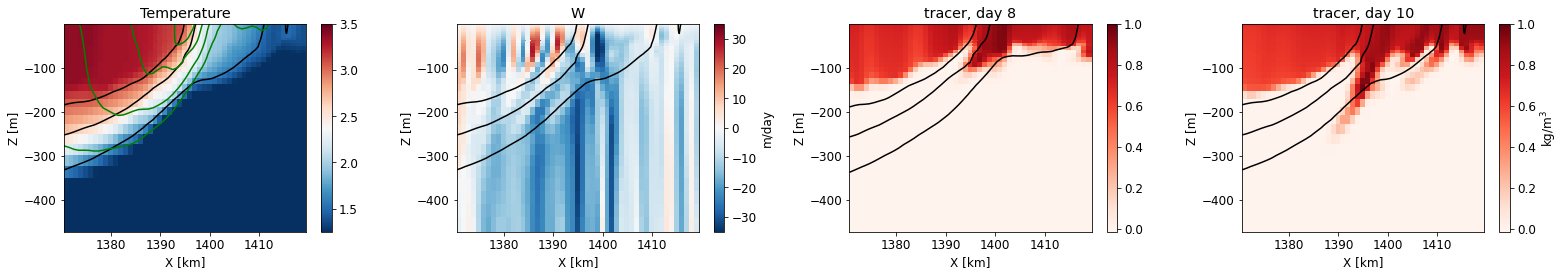

In [16]:
fig, ax = plt.subplots(1,4, figsize=(22,4))


im00 = ax[0].pcolormesh(T01.XC.values/1000, T01.Z.values, T01.rename(''), vmin = 1.25, vmax=3.5, cmap ='RdBu_r',
                          rasterized=True)
ax[0].set_xlabel('X [km]')
ax[0].set_ylabel('Z [m]')
ax[0].set_title('Temperature')
h00 = fig.colorbar(im00, ax=ax[0])
# h00.set_label('kg/s')
ax[0].contour(T01.XC.values/1000, T01.Z.values, (T01).rename(''), levels=[1.5,2.5,3], colors='k')
ax[0].contour(T01.XC.values/1000, T01.Z.values, (V01).rename(''), levels=[.3,.5,.75,1], colors='g')



im01 = ax[1].pcolormesh(W01.XC.values/1000, W01.Z.values, 86400*W01.rename(''), vmax = 35, vmin = -35, cmap ='RdBu_r',
                          rasterized=True)
ax[1].set_xlabel('X [km]')
ax[1].set_ylabel('Z [m]')
ax[1].set_title('W')
h01 = fig.colorbar(im01, ax=ax[1])
h01.set_label('m/day')
ax[1].contour(T01.XC.values/1000, T01.Z.values, (T01).rename(''), levels=[1.5,2.5,3], colors='k')




im02 = ax[2].pcolormesh(T01.XC.values/1000, T01.Z.values, tra1.rename(''), vmax = 1,  cmap='Reds', 
                          rasterized=True)
ax[2].set_xlabel('X [km]')
ax[2].set_ylabel('Z [m]')
ax[2].set_title('tracer, day 8')
h02 = fig.colorbar(im02, ax=ax[2])
# h00.set_label('kg/s')
ax[2].contour(T00.XC.values/1000, T00.Z.values, (T00).rename(''), levels=[1.5,2.5,3], colors='k')




im03 = ax[3].pcolormesh(T01.XC.values/1000, T01.Z.values, tra3.rename(''),  vmax = 1, cmap ='Reds',
                          rasterized=True)
ax[3].set_xlabel('X [km]')
ax[3].set_ylabel('Z [m]')
ax[3].set_title('tracer, day 10')
h03 = fig.colorbar(im03, ax=ax[3])
h03.set_label('kg/m$^3$')
ax[3].contour(T01.XC.values/1000, T01.Z.values, (T01).rename(''), levels=[1.5,2.5,3], colors='k')

plt.tight_layout()